**Exploratory Data Analysis - Terrorism**

**As a security/defense analyst, try to find out the hot zone of terrorism.**

**Done by Pratik Khedkar**

In [1]:
# first we are importing all required libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore the warnings
import warnings as wg

In [2]:
# Now turn to read the csv file (dataset)
df = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin',low_memory=False)

# to print of first 5 records (rows)
df.head() 

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [3]:
# Over - all Information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(56), int64(21), object(58)
memory usage: 187.1+ MB


In [4]:
# Shape of the data
df.shape 

(181691, 135)

In [5]:
# Verifying the columns inside the dataset
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [6]:
#statistical overview of data and described all the features
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002704e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325955e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991020e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009020e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014080e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017120e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
# Now turn to check all the null values

df.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [10]:
# checking for duplicate values
df.duplicated().sum()

4550

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

In [11]:
# Number of unique values in each columns

for i in df.columns:
    print(i,len(df[i].unique()))

eventid 576
iyear 47
imonth 13
iday 32
approxdate 2245
extended 2
resolution 1860
country 205
country_txt 205
region 12
region_txt 12
provstate 2856
city 36674
latitude 48323
longitude 48040
specificity 6
vicinity 3
location 44110
summary 112493
crit1 2
crit2 2
crit3 2
doubtterr 4
alternative 6
alternative_txt 6
multiple 3
success 2
suicide 2
attacktype1 9
attacktype1_txt 9
attacktype2 10
attacktype2_txt 10
attacktype3 9
attacktype3_txt 9
targtype1 22
targtype1_txt 22
targsubtype1 113
targsubtype1_txt 113
corp1 33238
target1 86006
natlty1 216
natlty1_txt 216
targtype2 23
targtype2_txt 23
targsubtype2 108
targsubtype2_txt 108
corp2 2692
target2 5044
natlty2 159
natlty2_txt 159
targtype3 21
targtype3_txt 21
targsubtype3 93
targsubtype3_txt 93
corp3 423
target3 721
natlty3 111
natlty3_txt 111
gname 3537
gsubname 1184
gname2 434
gsubname2 61
gname3 117
gsubname3 15
motive 14491
guncertain1 3
guncertain2 3
guncertain3 3
individual 2
nperps 114
nperpcap 51
claimed 4
claimmode 11
claimmode_tx

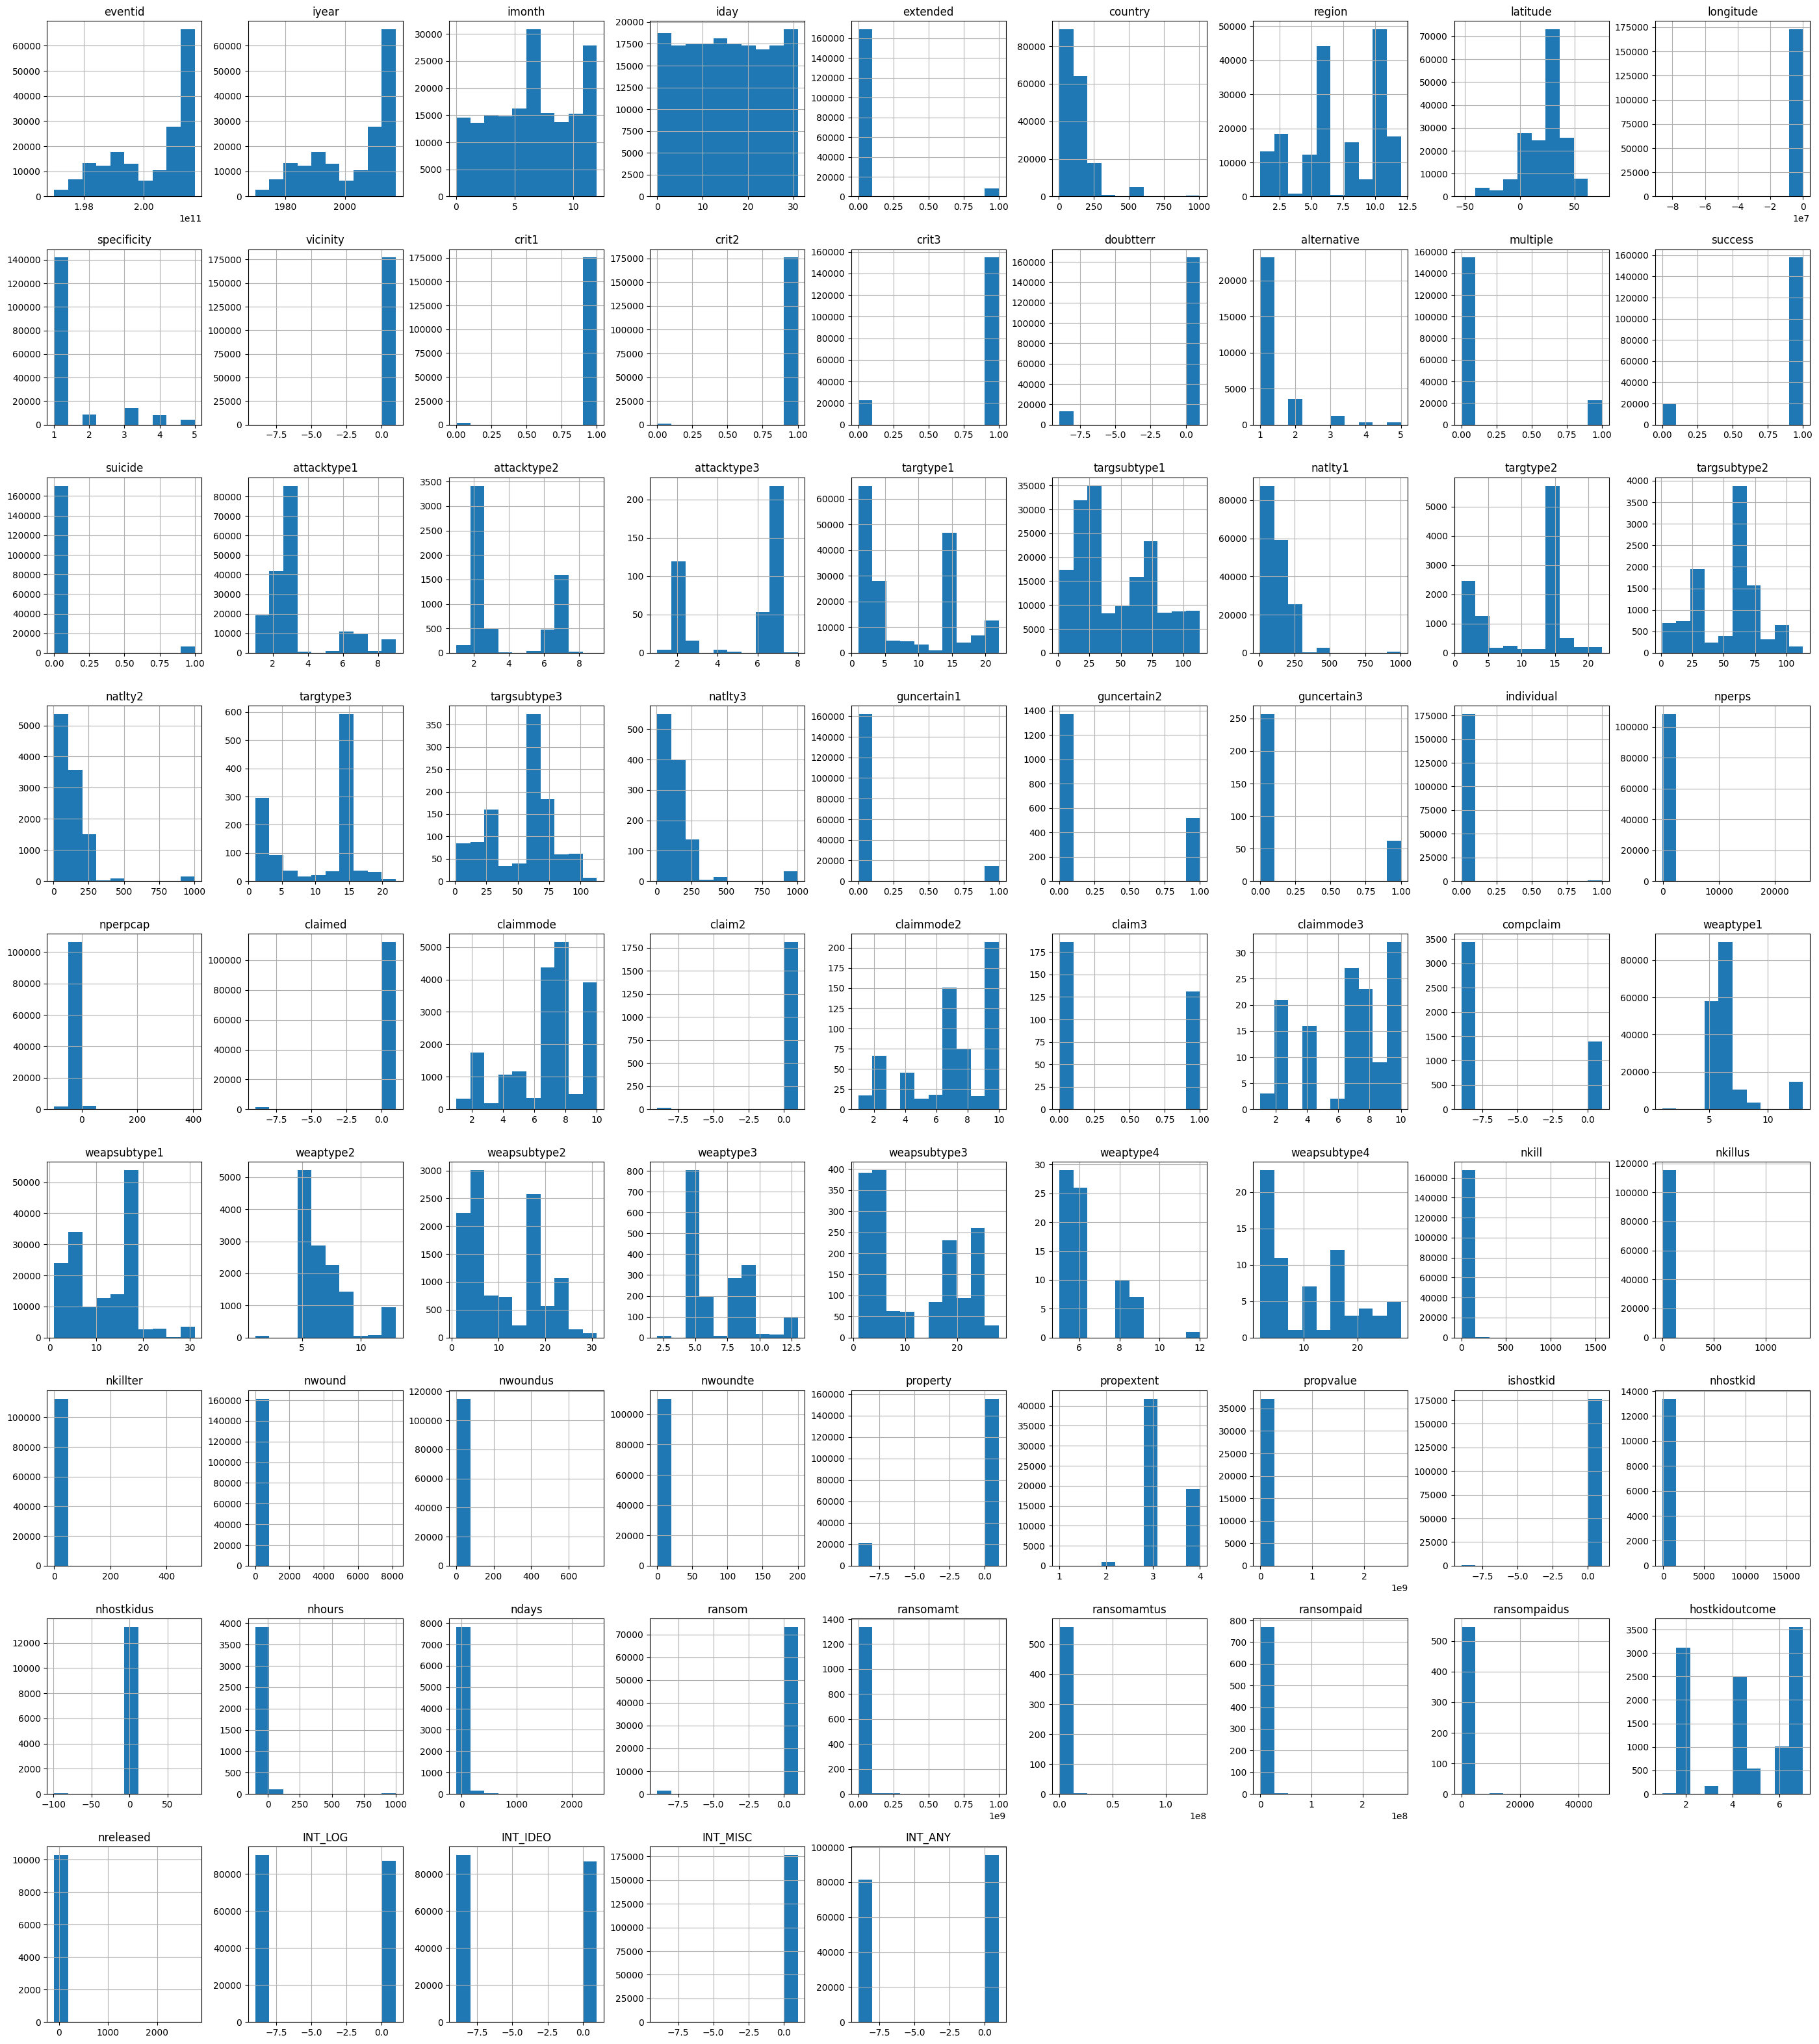

In [14]:
# Using histogram to represent the relationship between all features

df.hist(figsize=(35,40))
plt.show()

Text(0.5, 1.0, 'Region-wise terrorist activity in each year ')

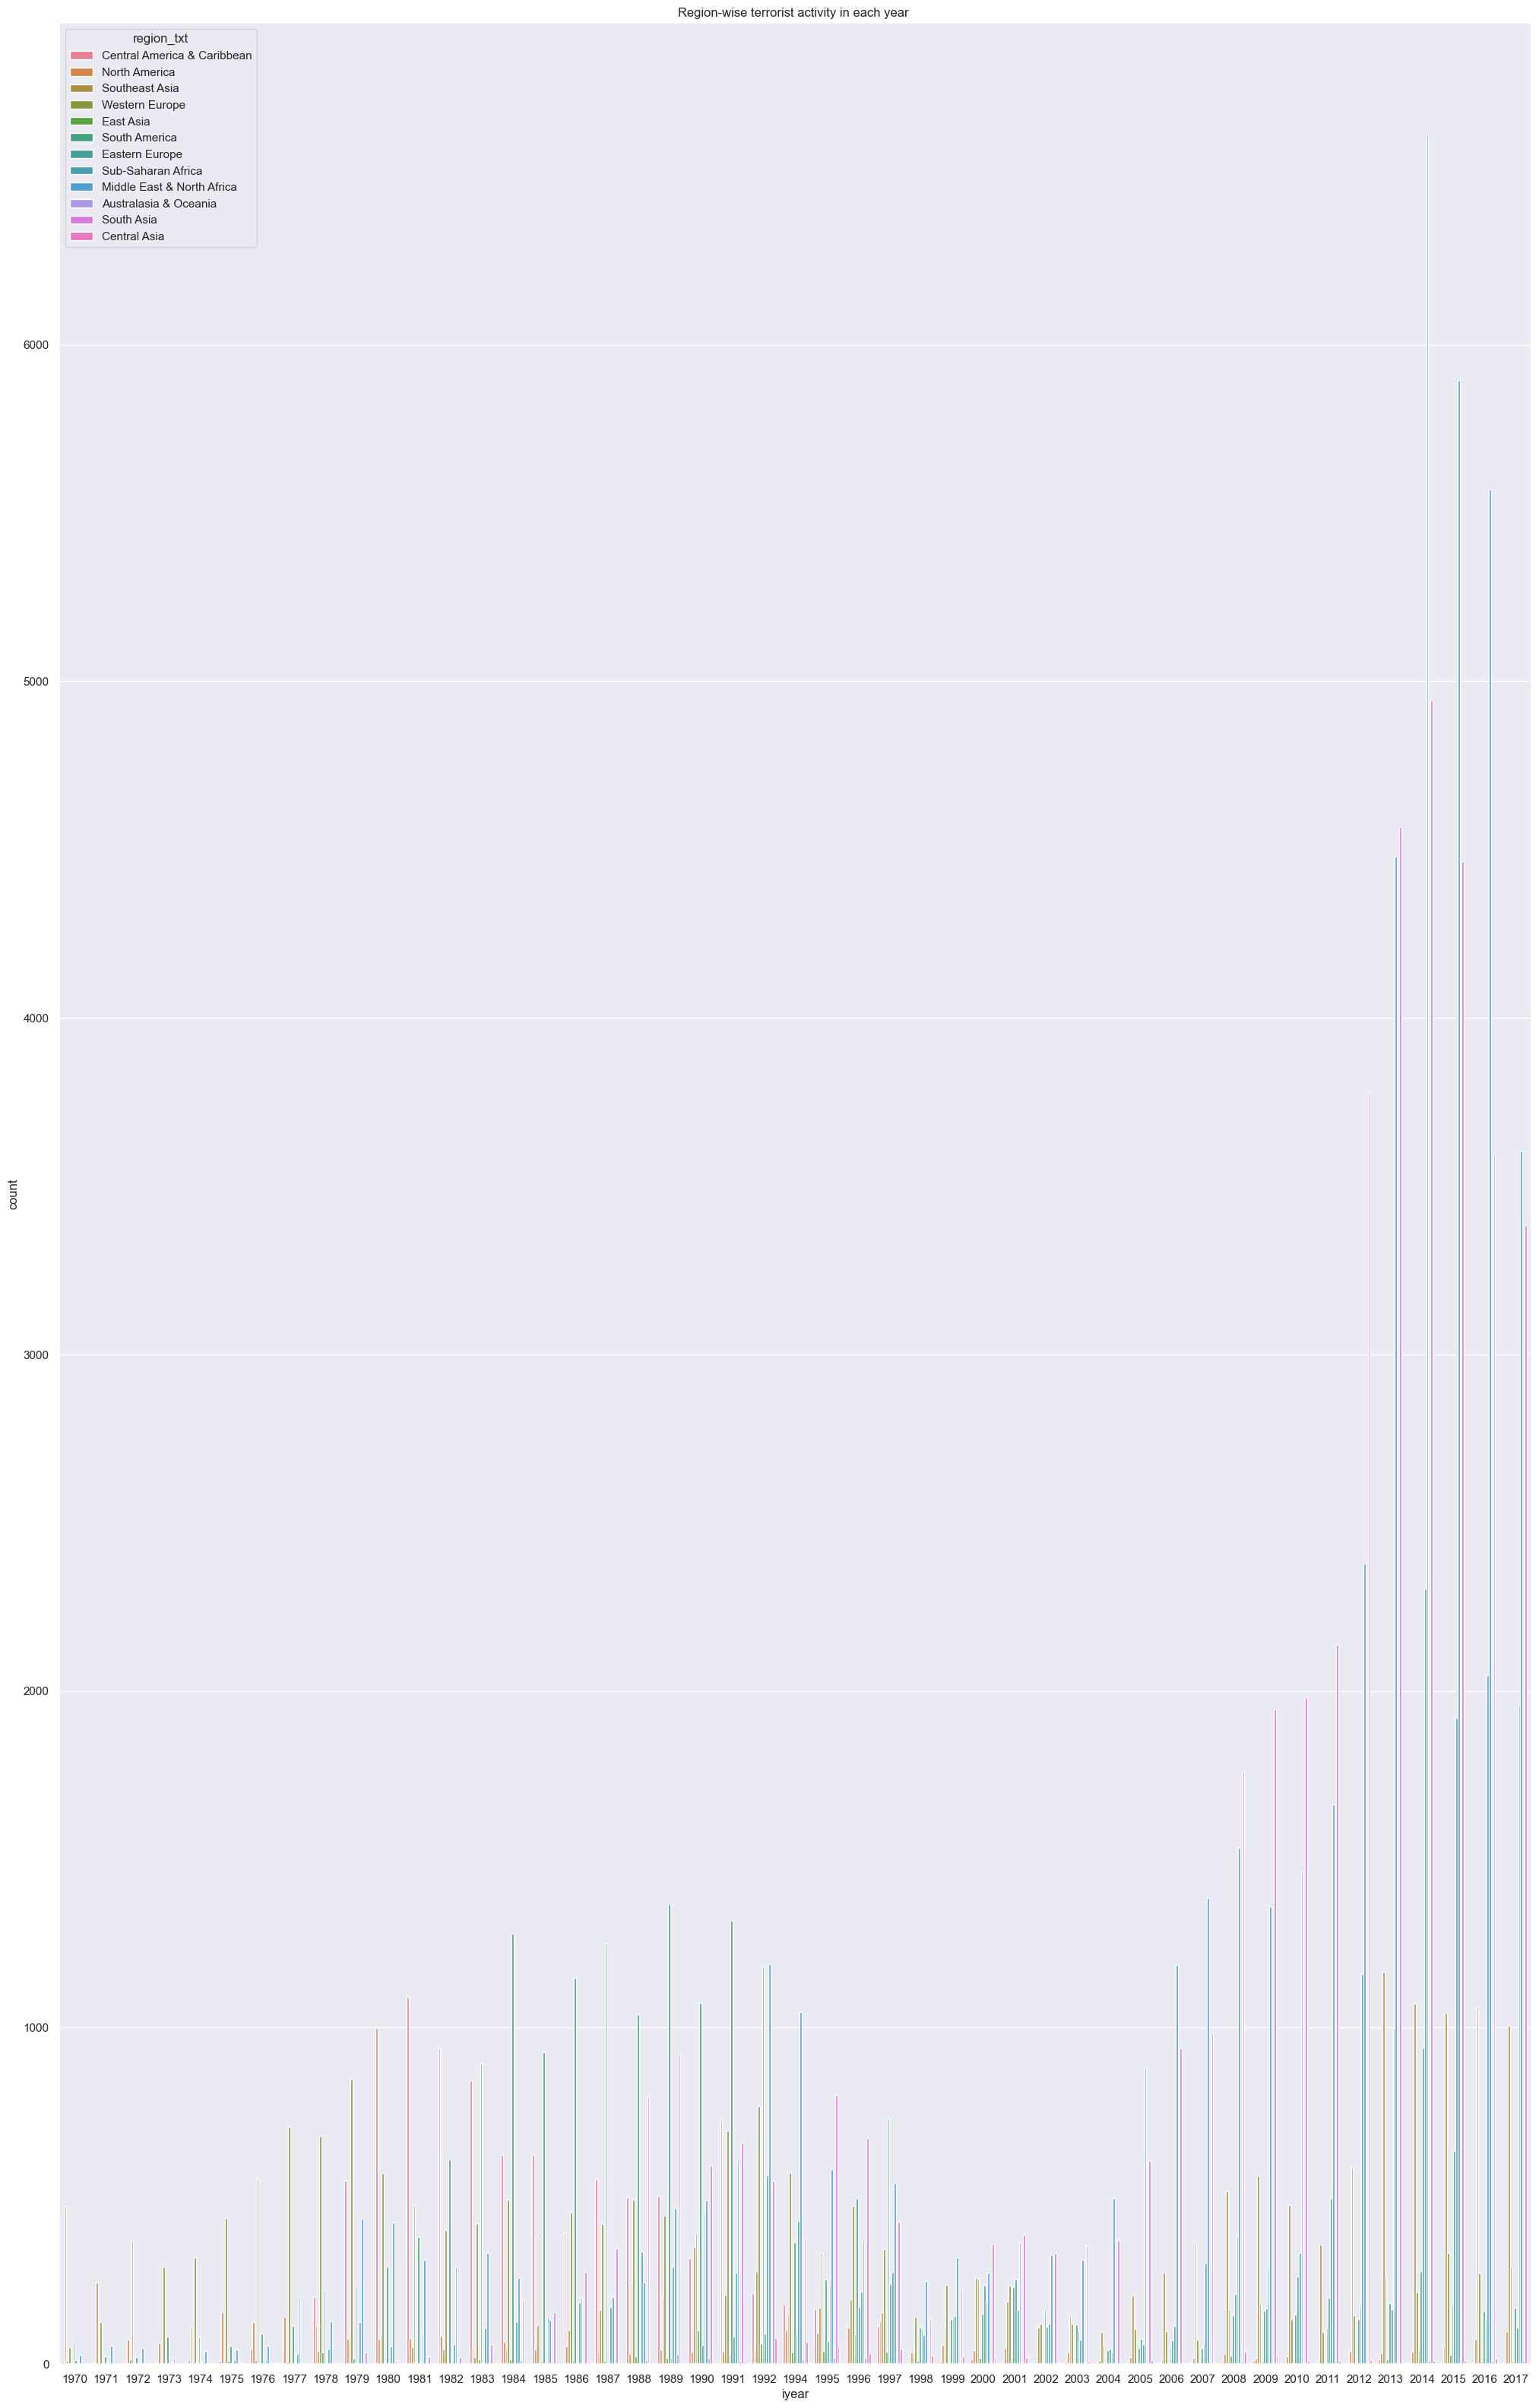

In [15]:
sns.set(rc={'figure.figsize':(25,40)})
sns.countplot(x=df['iyear'], hue=df['region_txt'])
plt.title('Region-wise terrorist activity in each year ')

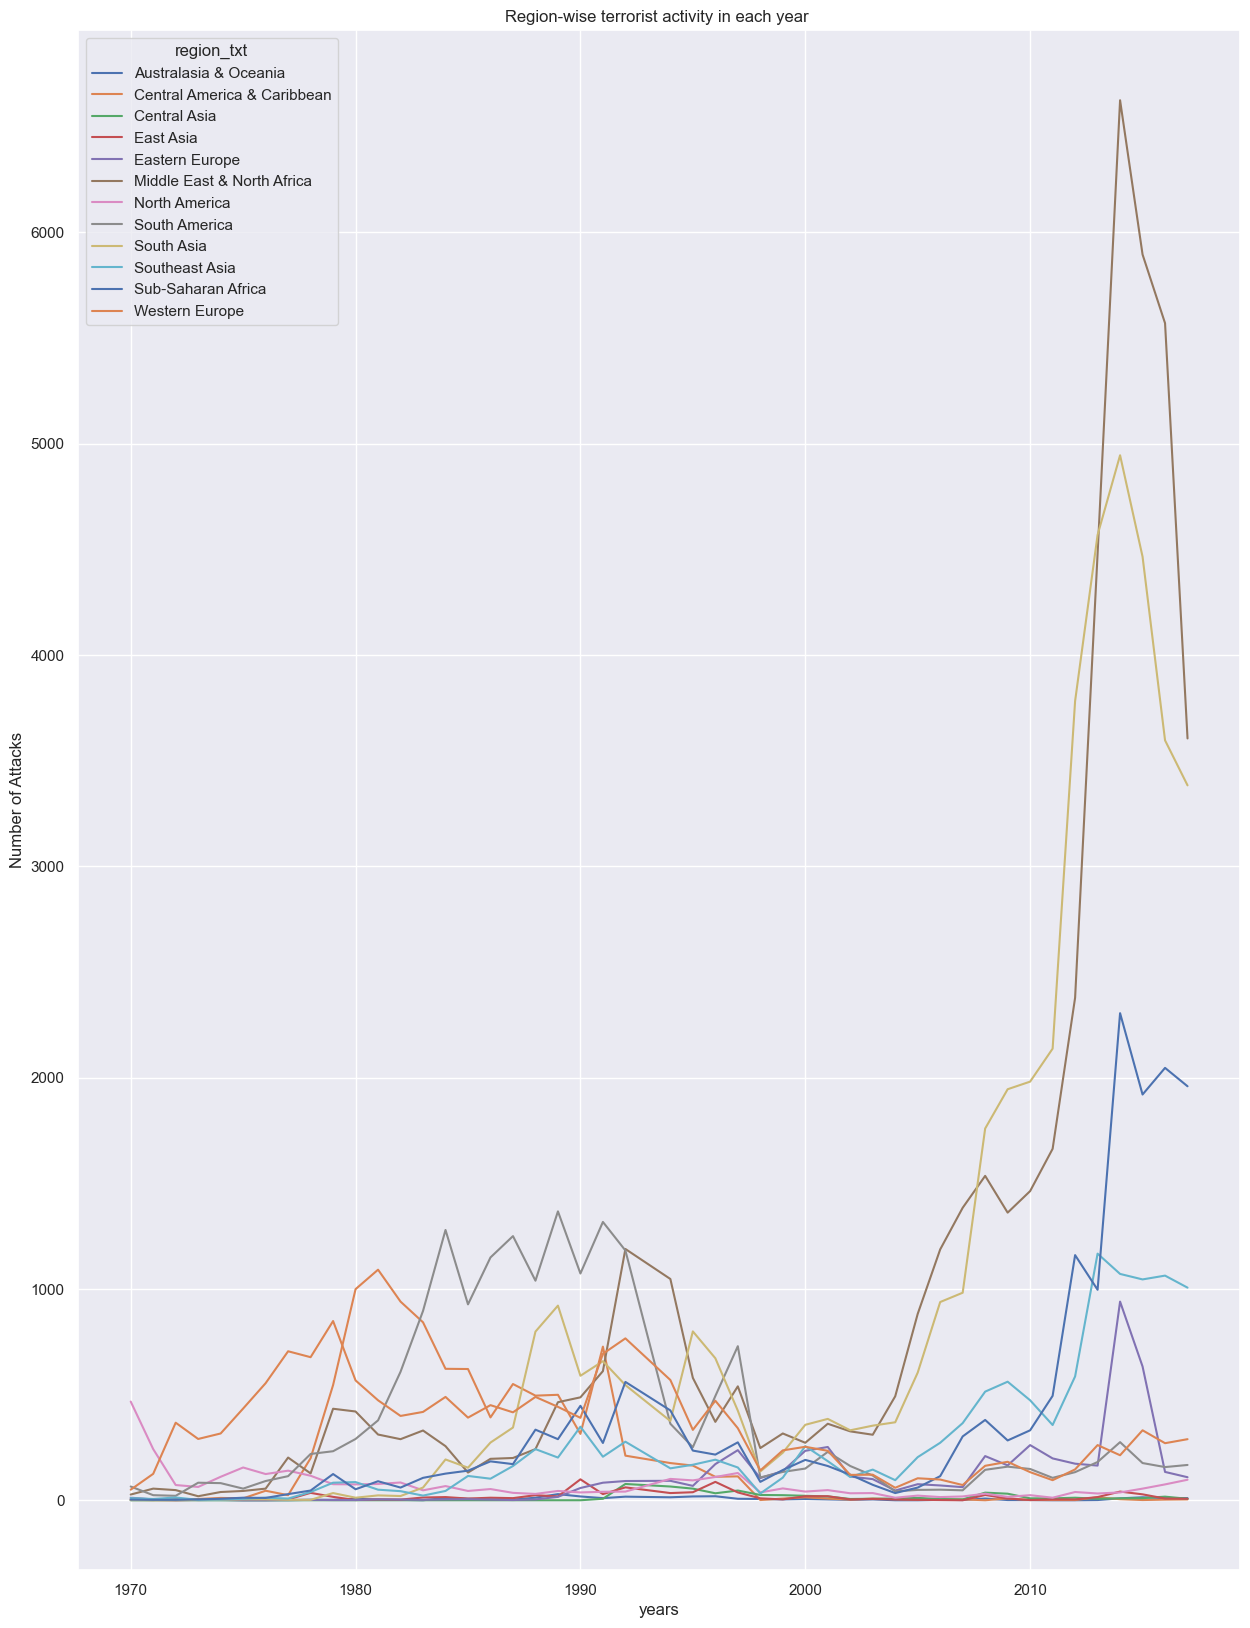

Middle east & North Africa has been reported to have more incidents


In [16]:
# A more graph for better understanding region wise terrorist attacks in each year
# Otherwisw we you can use pd.crosstab(df.iyear,df.region_txt)

pd.crosstab(df['iyear'],df['region_txt']).plot(kind='line',figsize=(15,20))
plt.title('Region-wise terrorist activity in each year ')
plt.ylabel('Number of Attacks')
plt.xlabel('years')
plt.show()

print('Middle east & North Africa has been reported to have more incidents')

In [17]:
# Most effected region

df['region_txt'].value_counts()

region_txt
Middle East & North Africa     49063
South Asia                     44152
South America                  18309
Sub-Saharan Africa             17381
Western Europe                 15984
Southeast Asia                 12361
Central America & Caribbean     9819
Eastern Europe                  5049
North America                   3408
East Asia                        778
Central Asia                     560
Australasia & Oceania            277
Name: count, dtype: int64

In [18]:
# Most effected countries

df['country_txt'].value_counts()

country_txt
Iraq                   23553
Pakistan               13959
Afghanistan            12546
India                  11828
Colombia                8104
                       ...  
New Hebrides               1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
North Korea                1
Name: count, Length: 205, dtype: int64

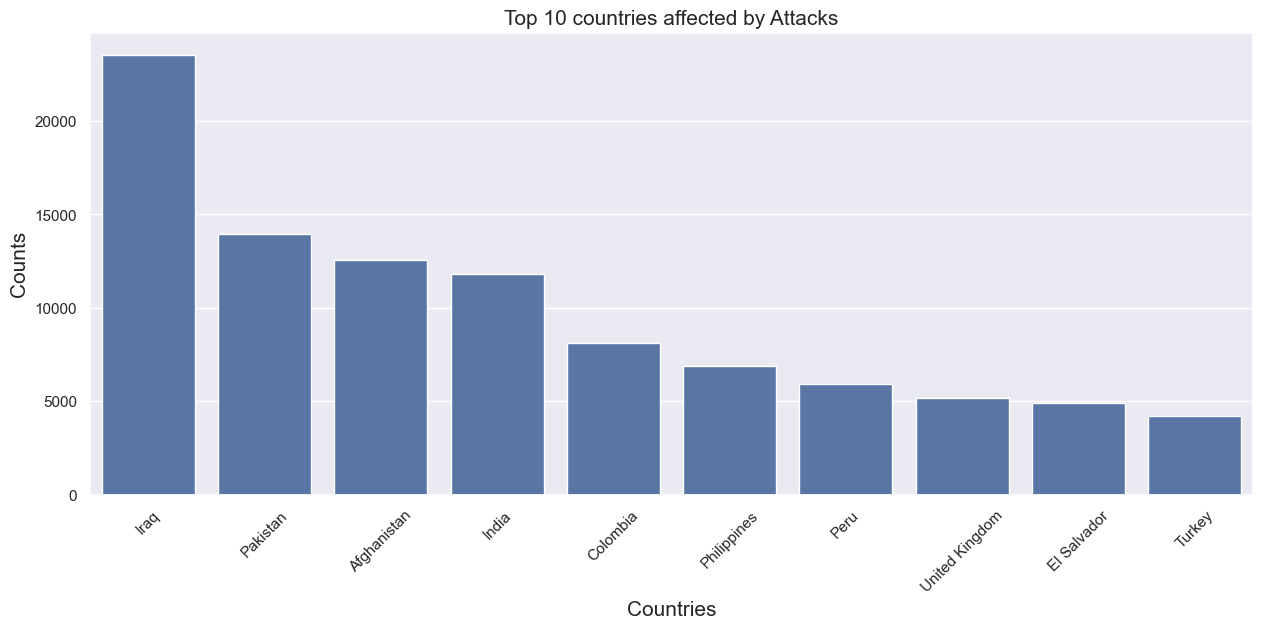

The most affected country is Iraq, which mostly belongs to the Asian continent.


In [20]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['country_txt'].value_counts()[:10].index, y=df['country_txt'].value_counts()[:10].values)
plt.title('Top 10 countries affected by Attacks', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('Countries', fontsize=15)

# Rotate x labels for better readability
plt.xticks(rotation=45)  
plt.show()

print('The most affected country is Iraq, which mostly belongs to the Asian continent.')

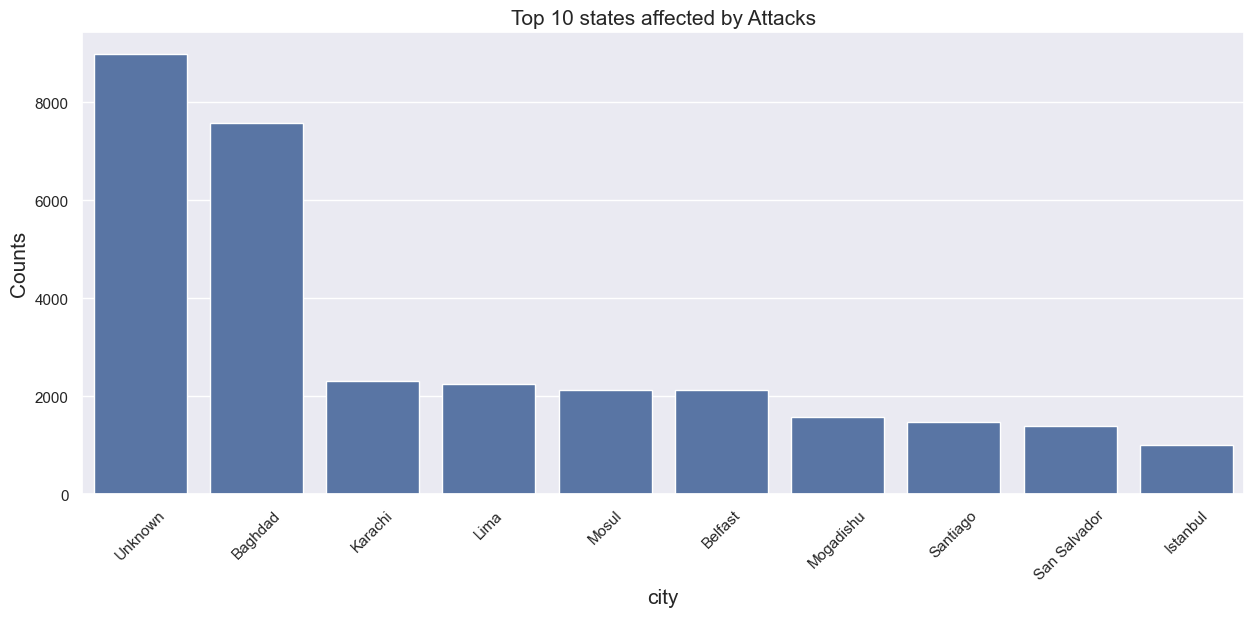

The most affected states are: Unknown, Baghdad


In [23]:
plt.figure(figsize=(15,6))
sns.barplot(x=df['city'].value_counts()[:10].index, y=df['city'].value_counts()[:10].values)

plt.title('Top 10 states affected by Attacks', fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xlabel('city', fontsize=15)

# Rotate x labels for better readability
plt.xticks(rotation=45)  
plt.show()

print("The most affected states are:", ', '.join(df['city'].value_counts().index[:2]))

Private Citizens/Property is the highly target type in each region


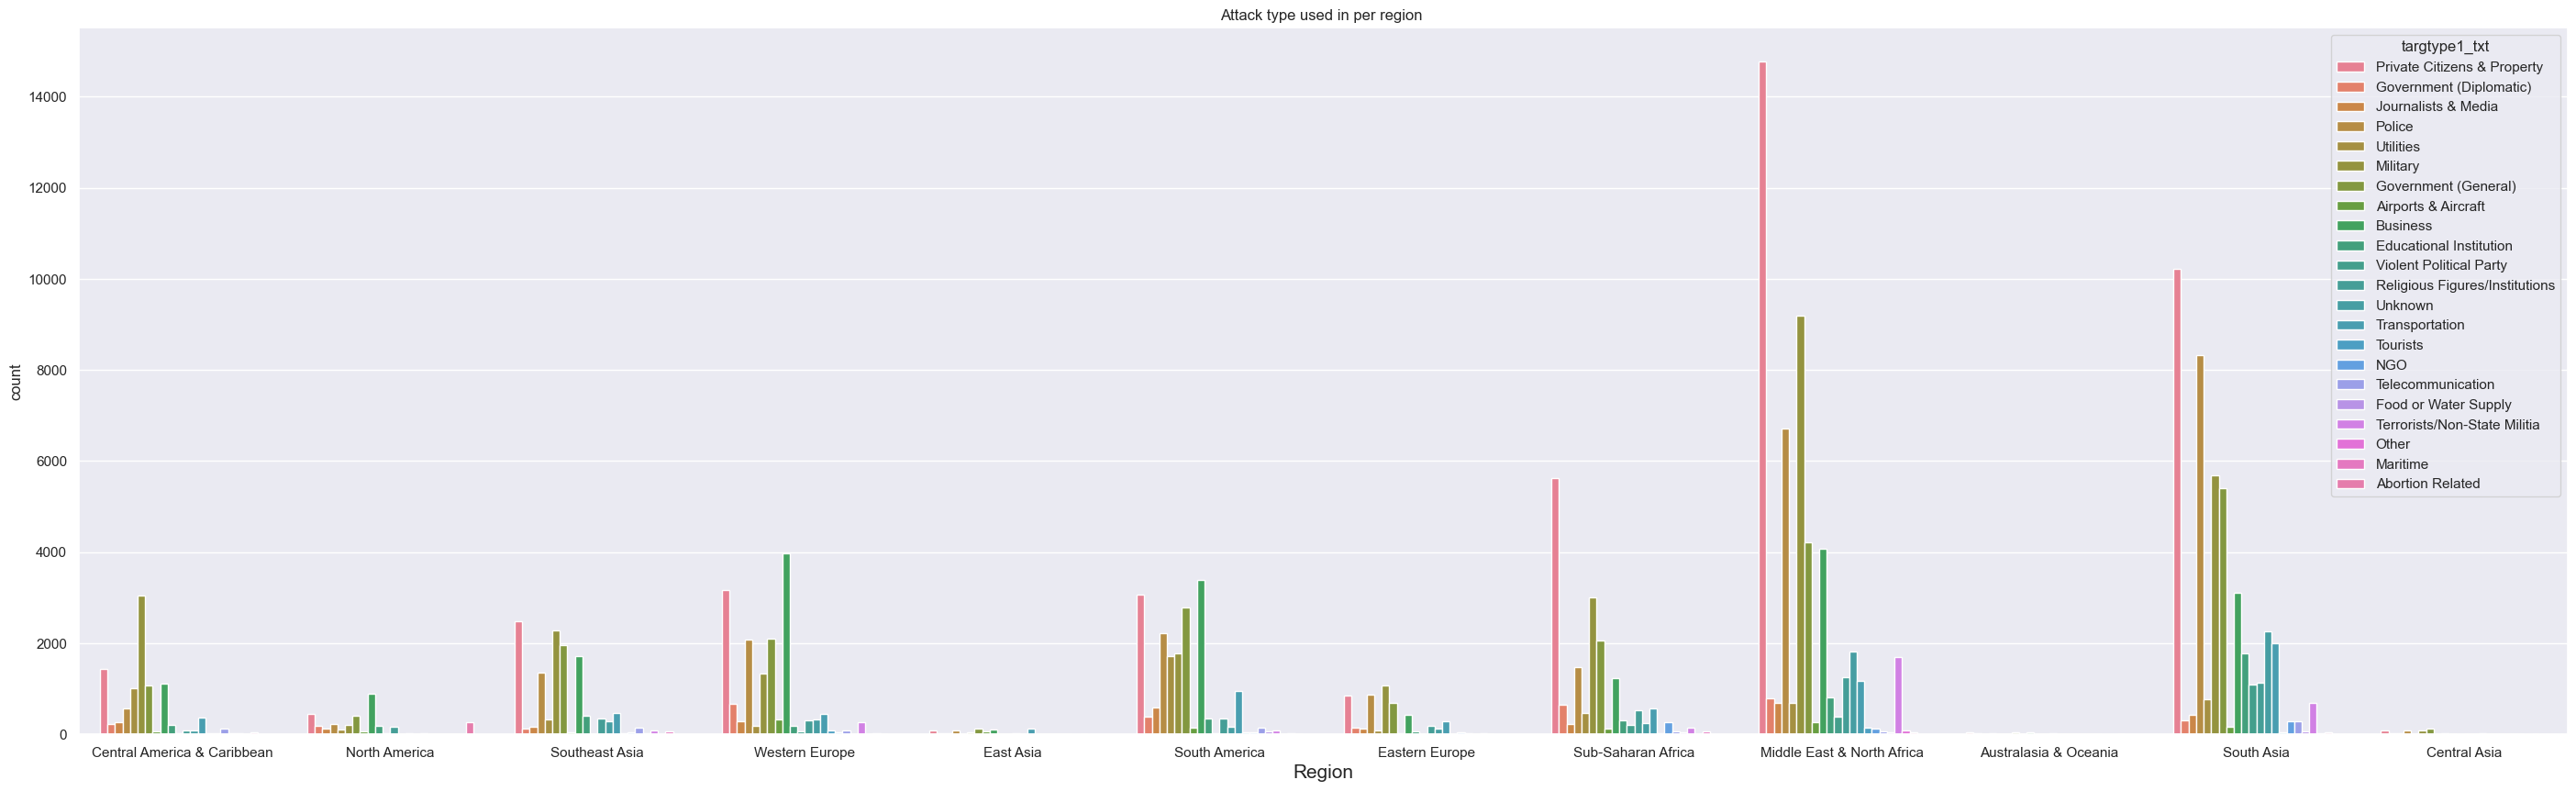

In [24]:
sns.set(rc={'figure.figsize':(35,10)})
sns.countplot(x=df['region_txt'], hue=df['targtype1_txt'])

plt.title('Attack type used in per region ')
plt.xlabel('Region',fontsize=15)

print('Private Citizens/Property is the highly target type in each region')

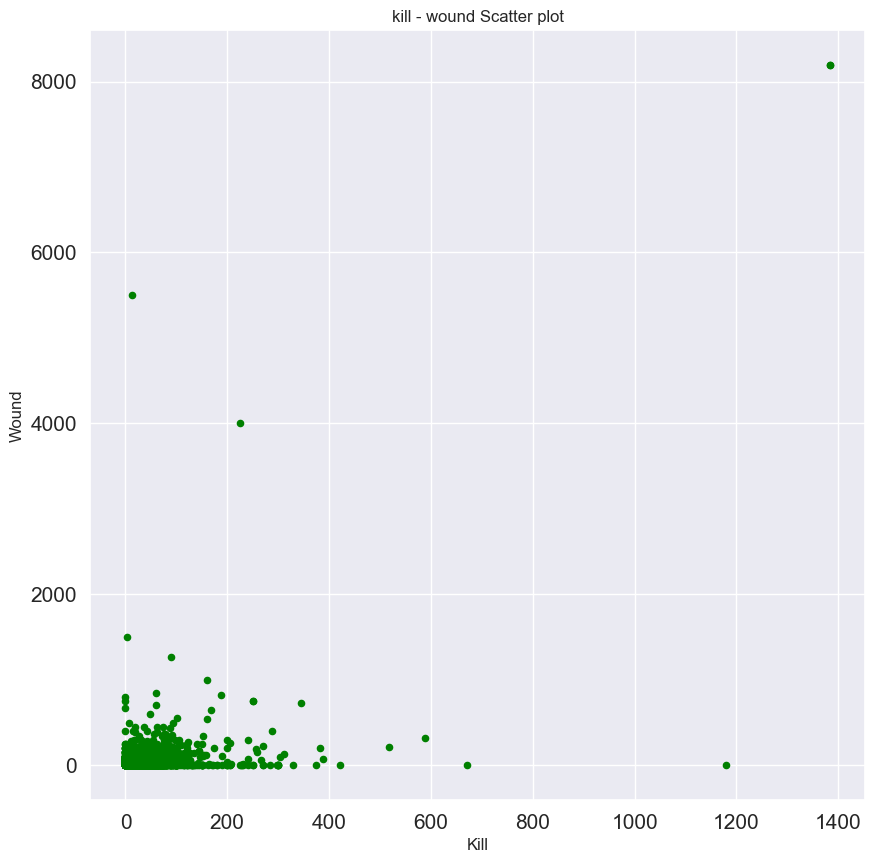

In [25]:
# Death and injuries all the time

df.plot(kind='scatter',x='nkill',y='nwound',color='green',figsize=(10,10),fontsize=15)
plt.xlabel('Kill')
plt.ylabel('Wound')
plt.title('kill - wound Scatter plot')
plt.show()

***Conclusion :- The majority of terrorist attacks had low rates of fatalities and injuries, but a tiny percentage of them resulted in excessive numbers of casualties.***

In [26]:
# Now we are going to analysis the data of INDIA.

new=df[df['country_txt']=='India']['city']
new.value_counts()

# Most effected city of india - Sri nagar 

city
Srinagar                     643
Unknown                      561
Imphal                       426
New Delhi                    154
Amritsar                     137
                            ... 
Hiyangthang Maning Leikai      1
Bhagirath Para                 1
Leimakhong                     1
Halwara                        1
Hungrum                        1
Name: count, Length: 4798, dtype: int64

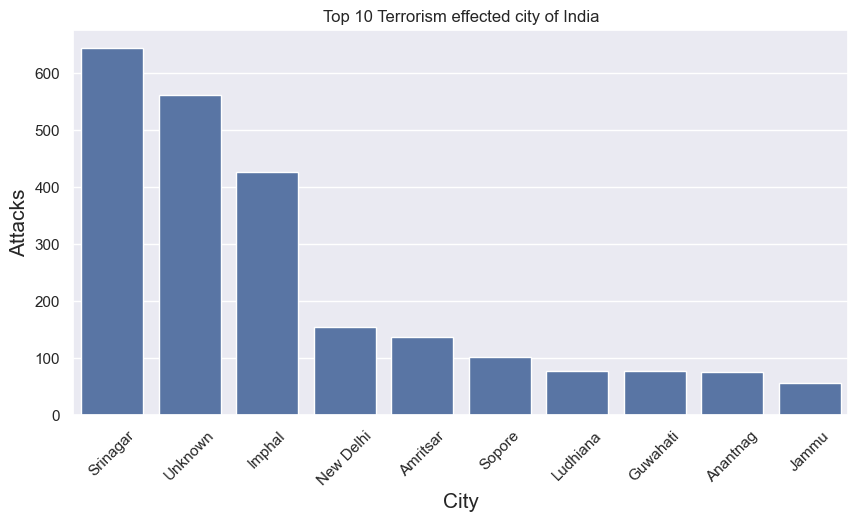

In [28]:
#Terroism effected in India

plt.figure(figsize=(10,5))
sns.barplot(x=new.value_counts()[:10].index, y=new.value_counts()[:10].values)
plt.title('Top 10 Terrorism effected city of India')
plt.xlabel('City', fontsize=15)
plt.ylabel('Attacks', fontsize=15)
plt.xticks(rotation=45)

plt.show()

In [29]:
# This is the top 10 location of india with attack details.

new=df[df['country_txt']=='India'][['city','iyear','attacktype1_txt','gname']]
new[:10]

,city,iyear,attacktype1_txt,gname
1186,New Delhi,1972,Hijacking,Palestinians
2764,Samastipur,1975,Bombing/Explosion,Ananda Marga
3857,New Delhi,1976,Bombing/Explosion,Unknown
5327,Bombay,1977,Hijacking,Japanese Red Army (JRA)
7337,Unknown,1979,Armed Assault,Naga People
7342,Imphal,1979,Assassination,Unknown
8174,Unknown,1979,Armed Assault,Meitei extremists
8685,Unknown,1979,Assassination,Mizo National Front
8831,Unknown,1979,Armed Assault,Mizo National Front
8836,Aizawl,1979,Facility/Infrastructure Attack,Mizo National Front


In [30]:
df['iyear'].value_counts()[:10]

iyear
2014    16475
2015    14573
2016    12949
2013    11885
2017    10643
2012     8414
2011     5075
1992     5017
2010     4826
2008     4804
Name: count, dtype: int64

In [31]:
#top 10 terriorst groups 

df['gname'].value_counts()[:10]

gname
Unknown                                             80589
Taliban                                              7326
Islamic State of Iraq and the Levant (ISIL)          5220
Shining Path (SL)                                    4409
Al-Shabaab                                           3273
Farabundo Marti National Liberation Front (FMLN)     3075
New People's Army (NPA)                              2754
Irish Republican Army (IRA)                          2604
Revolutionary Armed Forces of Colombia (FARC)        2481
Boko Haram                                           2397
Name: count, dtype: int64

In [32]:
# This is the top terriorst attack type

new=df[df['country_txt']=='India']['attacktype1_txt']
new.value_counts()

attacktype1_txt
Bombing/Explosion                      4759
Armed Assault                          3180
Assassination                          1219
Hostage Taking (Kidnapping)            1184
Facility/Infrastructure Attack          957
Unknown                                 308
Unarmed Assault                         134
Hostage Taking (Barricade Incident)      44
Hijacking                                43
Name: count, dtype: int64

***Conclusion :-***

**1.The country with the most attacks is Iraq.
2. The majority of strikes was by Baghdad.
3. The majority of attacks was in Middle East and North Africa.
4. Less attack were in Oceania and Australasia region.
5. The highest number of attacks were in 2014.
6. Most attacks were held by Taliban's attacker.
7. The majority of attacks have done with explosions and bombings.
8. The most common target category were territory: Individuals/properties.
9. Asia is the most targeted continent.
10. The least common kind of attacks was hucking.
11. 1971 had the fewest attacks of year.**